# 1. Importing required libraries

In [5]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
# Importing Scipy for stats
from scipy import stats

# 2. Identifying the keypoints using mediapipe (Holistic Approach) (Our Contribution)

In [7]:
holisticMP = mp.solutions.holistic # creating the model that enforces a holistic approach
drawTools = mp.solutions.drawing_utils # creating the drawing tools (for marking and identification)

In [8]:
def detectWithMediaPipe(image, model):
    captureImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    captureImage.flags.writeable = False                  # Making image immutable
    result = model.process(image)                 # Processing the model to make prediction
    captureImage.flags.writeable = True                   # Making the image mutable
    captureImage = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Converting back to BGR
    return captureImage, result

In [9]:
def landmarkGeneration(image, results):
    drawTools.draw_landmarks(image, results.face_landmarks, holisticMP.FACEMESH_TESSELATION) # Recognising and marking the face connections
    drawTools.draw_landmarks(image, results.pose_landmarks, holisticMP.POSE_CONNECTIONS) # Recognising and marking the pose connections
    drawTools.draw_landmarks(image, results.left_hand_landmarks, holisticMP.HAND_CONNECTIONS) # Recognising and marking the left hand connections
    drawTools.draw_landmarks(image, results.right_hand_landmarks, holisticMP.HAND_CONNECTIONS) # Recognising and marking the right hand connections

In [10]:
def landmarkDrawing(image, results):
    # Face connection drawing
    drawTools.draw_landmarks(image, results.face_landmarks, holisticMP.FACEMESH_TESSELATION, 
                             drawTools.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             drawTools.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Pose connection drawing
    drawTools.draw_landmarks(image, results.pose_landmarks, holisticMP.POSE_CONNECTIONS,
                             drawTools.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             drawTools.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Left hand connection drawing
    drawTools.draw_landmarks(image, results.left_hand_landmarks, holisticMP.HAND_CONNECTIONS, 
                             drawTools.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             drawTools.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Right hand connection drawing 
    drawTools.draw_landmarks(image, results.right_hand_landmarks, holisticMP.HAND_CONNECTIONS, 
                             drawTools.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             drawTools.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
# The camera of the system is being turned on
cap = cv2.VideoCapture(0)
# Mediapipe model being set
with holisticMP.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # The feed being read
        ret, frame = cap.read()

        # Detecting the features
        image, results = detectWithMediaPipe(frame, holistic)
        print(results)
        
        # Landmarks being generated
        landmarkDrawing(image, results)

        # Opening the feed capture so the user can select the apt frames as per training needs
        cv2.imshow('OpenCV Feed', image)

        # Enabling user to exit by tapping 'q' after a minimum of 10 milliseconds
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
# Explaining the length of the captured left hand landmarks
len(results.left_hand_landmarks.landmark)

21

In [13]:
#Sample of the output being presented
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
#Creation of the landmarks
landmarkGeneration(frame, results)

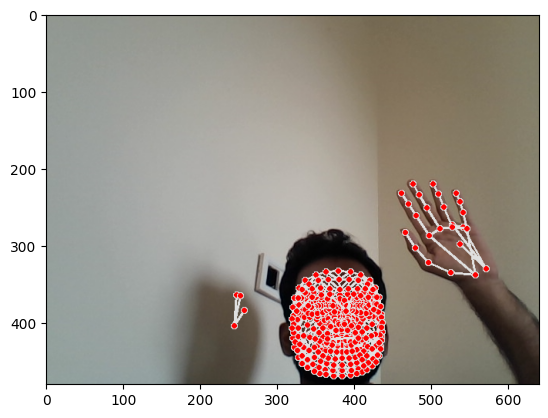

In [15]:
#Displaying the Plotted image
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Keypoints identification and its value extraction

In [16]:
len(results.left_hand_landmarks.landmark)

21

In [17]:
action = []
for frame in results.pose_landmarks.landmark:
    identification = np.array([frame.x, frame.y, frame.z, frame.visibility])
    action.append(identification)

In [18]:
action = np.array([[frame.x, frame.y, frame.z, frame.visibility] for frame in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
facial = np.array([[frame.x, frame.y, frame.z] for frame in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lHand = np.array([[frame.x, frame.y, frame.z] for frame in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rHand = np.array([[frame.x, frame.y, frame.z] for frame in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
def extract_keypoints(results):
    action = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    facial = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lHand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rHand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([action, facial, lHand, rHand])

In [20]:
testExtract = extract_keypoints(results)

In [21]:
testExtract

array([ 0.60786313,  0.80394119, -0.8818897 , ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', testExtract)

In [23]:
np.load('0.npy')

array([ 0.60786313,  0.80394119, -0.8818897 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Folders for data collection being created and dataset generation definition

In [24]:
# Data being collected and stored in a Dataset
DATA_PATH = os.path.join('Dataset') 

# Trial Actions being attempted to be detected
trialActions = np.array(['hello', 'thanks', 'iloveyou'])

# Each individual data in terms of number of videos to be recorded
noOfVideo = 30

# Frames of each video being defined
frameVideo = 30

In [25]:
for act in trialActions: 
    for video in range(noOfVideo):
        try: 
            os.makedirs(os.path.join(DATA_PATH, act, str(video)))
        except:
            pass

# 5. Collecting Keypoint Values for Training and Testing

In [26]:
#Activating capture
capture = cv2.VideoCapture(0)
# Fixation of the mediapipe model to be used 
with holisticMP.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop for ease of collection
    # Actions being looped and viewed
    for act in trialActions:
        # Going through the videos on time basis
        for sequence in range(noOfVideo):
            # Going through the frame length of each video
            for frame_num in range(frameVideo):

                # feed being analysed
                ret, frame = capture.read()

                # Detecting the actions
                image, results = detectWithMediaPipe(frame, holistic)
                print(results)

                # Landmark generation
                landmarkDrawing(image, results)
                
                # Applying the logic to wait between actions for ease of user to shift to next pose
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(trialActions, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Recording being displayed to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(trialActions, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Identification and marking of keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, act, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Exiting on the pressing of q key
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    capture.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [27]:
capture.release()
cv2.destroyAllWindows()

# 6. Data preproccessing, creation of labels, and feature extraction

In [28]:
#Importing training and testing split and categorical to create  categories based on data captured
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
#Creating the labels
mappingLabel = {label:num for num, label in enumerate(trialActions)}

In [30]:
# Displaying the labels
mappingLabel

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
# Pre processing
sequences, labels = [], []
for act in trialActions:
    for sequence in range(noOfVideo):
        window = []
        for frame in range(frameVideo):
            res = np.load(os.path.join(DATA_PATH, act, str(sequence), "{}.npy".format(frame)))
            window.append(res)
        sequences.append(window)
        labels.append(mappingLabel[act])

In [32]:
np.array(sequences).shape

(60, 20, 1662)

In [33]:
np.array(labels).shape

(60,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(60, 20, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [38]:
#Splitting the whole data set into training and testing and creating the test partition which is 15% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [39]:
y_test.shape

(9, 3)

# 7. Creation and Training of Sequence Induced LSTM Neural Network Model (Our Contribution)

In [40]:
# Importing Sequential for enabling the creation of a sequential neural network
from tensorflow.keras.models import Sequential
# Importing the LSTM layers for building temporal layers which will enable action detection and dense fully connected layers
from tensorflow.keras.layers import LSTM, Dense
# Importing tensorboard for logging, monitoring, and analysing our model
from tensorflow.keras.callbacks import TensorBoard

In [41]:
# Model Using RELU Activation

In [42]:
# Creating the log folder for TensorBoard for saving analytics on the model training and efficiency
directoryLogTB = os.path.join('Logs')
informationPassingTB = TensorBoard(log_dir=directoryLogTB)

In [43]:
# Initiation of the model with Sequential. This enables easy creation of the model with multiple layers with reduced complexity
NNLSTMModel = Sequential()
# Creating 3 sets of LSTM Layers, the first with 64 units followed by 128 units, and then 64 units again
# Utilisation of tensorflow with an LSTM layer it is mandatory for return_sequences to be true as the proceeding layer will need that
NNLSTMModel.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
NNLSTMModel.add(LSTM(128, return_sequences=True, activation='relu'))
NNLSTMModel.add(LSTM(64, return_sequences=False, activation='relu'))
# Dense layer does not require sequences. The following 3 layers are fully connected Dense layers.
NNLSTMModel.add(Dense(64, activation='relu'))
NNLSTMModel.add(Dense(32, activation='relu'))
NNLSTMModel.add(Dense(trialActions.shape[0], activation='softmax'))
# There will be 3 outputs. Activation being softmax will mean that the actions will be in probability form whose sum will be 1.

In [44]:
# Model is going to be compiled. We use Adam for optimization. Loss function is categorical_crossentropy as we have multi class classification model
NNLSTMModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
# Training the model. The cycle set is 200 . Callbacks is for sending information to tensorboard to be used for analysis. 
NNLSTMModel.fit(X_train, y_train, epochs=150, callbacks=[informationPassingTB])

Epoch 1/150
2/2 [==============================] - 5s 84ms/step - loss: 1.1477 - categorical_accuracy: 0.2941
Epoch 2/150
2/2 [==============================] - 0s 77ms/step - loss: 1.6324 - categorical_accuracy: 0.3333
Epoch 3/150
2/2 [==============================] - 0s 73ms/step - loss: 1.5172 - categorical_accuracy: 0.3333
Epoch 4/150
2/2 [==============================] - 0s 78ms/step - loss: 1.1936 - categorical_accuracy: 0.3725
Epoch 5/150
2/2 [==============================] - 0s 78ms/step - loss: 1.3335 - categorical_accuracy: 0.3725
Epoch 6/150
2/2 [==============================] - 0s 76ms/step - loss: 1.6904 - categorical_accuracy: 0.2353
Epoch 7/150
2/2 [==============================] - 0s 72ms/step - loss: 1.1280 - categorical_accuracy: 0.2549
Epoch 8/150
2/2 [==============================] - 0s 94ms/step - loss: 1.1125 - categorical_accuracy: 0.2157
Epoch 9/150
2/2 [==============================] - 0s 74ms/step - loss: 1.0968 - categorical_accuracy: 0.3725
Epoch 10/1

2/2 [==============================] - 0s 78ms/step - loss: 5.6494e-06 - categorical_accuracy: 1.0000
Epoch 147/150
2/2 [==============================] - 0s 73ms/step - loss: 5.2544e-06 - categorical_accuracy: 1.0000
Epoch 148/150
2/2 [==============================] - 0s 74ms/step - loss: 4.9669e-06 - categorical_accuracy: 1.0000
Epoch 149/150
2/2 [==============================] - 0s 75ms/step - loss: 4.6584e-06 - categorical_accuracy: 1.0000
Epoch 150/150
2/2 [==============================] - 0s 70ms/step - loss: 4.4060e-06 - categorical_accuracy: 1.0000


In [46]:
# A brief summary of the model. 
NNLSTMModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [47]:
# Model using Sigmoid

In [48]:
# Creating the log folder for TensorBoard for saving analytics on the model training and efficiency
directoryLogTBS = os.path.join('LogsSigmoid')
informationPassingTBS = TensorBoard(log_dir=directoryLogTBS)

In [49]:
# Initiation of the model with Sequential. This enables easy creation of the model with multiple layers with reduced complexity
NNLSTMModelSig = Sequential()
# Creating 3 sets of LSTM Layers, the first with 64 units followed by 128 units, and then 64 units again
# Utilisation of tensorflow with an LSTM layer it is mandatory for return_sequences to be true as the proceeding layer will need that
NNLSTMModelSig.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(20,1662)))
NNLSTMModelSig.add(LSTM(128, return_sequences=True, activation='sigmoid'))
NNLSTMModelSig.add(LSTM(64, return_sequences=False, activation='sigmoid'))
# Dense layer does not require sequences. The following 3 layers are fully connected Dense layers.
NNLSTMModelSig.add(Dense(64, activation='sigmoid'))
NNLSTMModelSig.add(Dense(32, activation='sigmoid'))
NNLSTMModelSig.add(Dense(trialActions.shape[0], activation='softmax'))
# There will be 3 outputs. Activation being softmax will mean that the actions will be in probability form whose sum will be 1.

In [50]:
# Model is going to be compiled. We use Adam for optimization. Loss function is categorical_crossentropy as we have multi class classification model
NNLSTMModelSig.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
# Training the model. The cycle set is 500 . Callbacks is for sending information to tensorboard to be used for analysis. 
NNLSTMModelSig.fit(X_train, y_train, epochs=150, callbacks=[informationPassingTBS])

Epoch 1/150
2/2 [==============================] - 6s 80ms/step - loss: 1.4109 - categorical_accuracy: 0.3333
Epoch 2/150
2/2 [==============================] - 0s 90ms/step - loss: 1.3140 - categorical_accuracy: 0.3333
Epoch 3/150
2/2 [==============================] - 0s 90ms/step - loss: 1.2396 - categorical_accuracy: 0.3333
Epoch 4/150
2/2 [==============================] - 0s 84ms/step - loss: 1.1755 - categorical_accuracy: 0.3333
Epoch 5/150
2/2 [==============================] - 0s 80ms/step - loss: 1.1336 - categorical_accuracy: 0.3333
Epoch 6/150
2/2 [==============================] - 0s 75ms/step - loss: 1.1127 - categorical_accuracy: 0.3333
Epoch 7/150
2/2 [==============================] - 0s 74ms/step - loss: 1.0984 - categorical_accuracy: 0.3333
Epoch 8/150
2/2 [==============================] - 0s 89ms/step - loss: 1.0971 - categorical_accuracy: 0.3725
Epoch 9/150
2/2 [==============================] - 0s 78ms/step - loss: 1.0980 - categorical_accuracy: 0.3725
Epoch 10/1

2/2 [==============================] - 0s 74ms/step - loss: 1.0955 - categorical_accuracy: 0.3725
Epoch 148/150
2/2 [==============================] - 0s 72ms/step - loss: 1.0943 - categorical_accuracy: 0.3725
Epoch 149/150
2/2 [==============================] - 0s 73ms/step - loss: 1.0940 - categorical_accuracy: 0.3725
Epoch 150/150
2/2 [==============================] - 0s 74ms/step - loss: 1.0936 - categorical_accuracy: 0.3725


In [52]:
# A brief summary of the model. 
NNLSTMModelSig.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [53]:
# SELU

In [54]:
# Creating the log folder for TensorBoard for saving analytics on the model training and efficiency
directoryLogTBSELU = os.path.join('LogsSELU')
informationPassingTBSELU = TensorBoard(log_dir=directoryLogTBSELU)

In [55]:
# Initiation of the model with Sequential. This enables easy creation of the model with multiple layers with reduced complexity
NNLSTMModelSELU = Sequential()
# Creating 3 sets of LSTM Layers, the first with 64 units followed by 128 units, and then 64 units again
# Utilisation of tensorflow with an LSTM layer it is mandatory for return_sequences to be true as the proceeding layer will need that
NNLSTMModelSELU.add(LSTM(64, return_sequences=True, activation='selu', input_shape=(20,1662)))
NNLSTMModelSELU.add(LSTM(128, return_sequences=True, activation='selu'))
NNLSTMModelSELU.add(LSTM(64, return_sequences=False, activation='selu'))
# Dense layer does not require sequences. The following 3 layers are fully connected Dense layers.
NNLSTMModelSELU.add(Dense(64, activation='selu'))
NNLSTMModelSELU.add(Dense(32, activation='selu'))
NNLSTMModelSELU.add(Dense(trialActions.shape[0], activation='softmax'))
# There will be 3 outputs. Activation being softmax will mean that the actions will be in probability form whose sum will be 1.

In [56]:
# Model is going to be compiled. We use Adam for optimization. Loss function is categorical_crossentropy as we have multi class classification model
NNLSTMModelSELU.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
# Training the model. The cycle set is 500 . Callbacks is for sending information to tensorboard to be used for analysis. 
NNLSTMModelSELU.fit(X_train, y_train, epochs=150, callbacks=[informationPassingTBSELU])

Epoch 1/150
2/2 [==============================] - 6s 86ms/step - loss: 1.3124 - categorical_accuracy: 0.3333
Epoch 2/150
2/2 [==============================] - 0s 98ms/step - loss: 3.5911 - categorical_accuracy: 0.3529
Epoch 3/150
2/2 [==============================] - 0s 91ms/step - loss: 2.5934 - categorical_accuracy: 0.3725
Epoch 4/150
2/2 [==============================] - 0s 90ms/step - loss: 2.2543 - categorical_accuracy: 0.4706
Epoch 5/150
2/2 [==============================] - 0s 88ms/step - loss: 1.5712 - categorical_accuracy: 0.3922
Epoch 6/150
2/2 [==============================] - 0s 82ms/step - loss: 2.4792 - categorical_accuracy: 0.3529
Epoch 7/150
2/2 [==============================] - 0s 78ms/step - loss: 1.8696 - categorical_accuracy: 0.3333
Epoch 8/150
2/2 [==============================] - 0s 84ms/step - loss: 1.1619 - categorical_accuracy: 0.3725
Epoch 9/150
2/2 [==============================] - 0s 73ms/step - loss: 1.1471 - categorical_accuracy: 0.3725
Epoch 10/1

2/2 [==============================] - 0s 77ms/step - loss: 3.1314e-04 - categorical_accuracy: 1.0000
Epoch 147/150
2/2 [==============================] - 0s 73ms/step - loss: 3.0907e-04 - categorical_accuracy: 1.0000
Epoch 148/150
2/2 [==============================] - 0s 72ms/step - loss: 3.0366e-04 - categorical_accuracy: 1.0000
Epoch 149/150
2/2 [==============================] - 0s 75ms/step - loss: 2.9870e-04 - categorical_accuracy: 1.0000
Epoch 150/150
2/2 [==============================] - 0s 74ms/step - loss: 2.9554e-04 - categorical_accuracy: 1.0000


# 8. Testing the created model with test data and manual confirmation

In [58]:
# RELU

In [59]:
# Testing the model
trial = NNLSTMModel.predict(X_test)

1/1 [==============================] - 1s 773ms/step


In [60]:
# Getting the models predicted output
trialActions[np.argmax(trial[0])]

'iloveyou'

In [61]:
# Calling the actual output for comparison
trialActions[np.argmax(y_test[0])]

'iloveyou'

In [62]:
# Sigmoid

In [63]:
# Testing the model
trial1 = NNLSTMModelSig.predict(X_test)

1/1 [==============================] - 1s 716ms/step


In [64]:
# Getting the models predicted output
trialActions[np.argmax(trial1[0])]

'thanks'

In [65]:
# Calling the actual output for comparison
trialActions[np.argmax(y_test[0])]

'iloveyou'

In [66]:
# SELU

In [67]:
# Testing the model
trial2 = NNLSTMModelSELU.predict(X_test)

1/1 [==============================] - 1s 706ms/step


In [68]:
# Getting the models predicted output
trialActions[np.argmax(trial2[0])]

'iloveyou'

In [69]:
# Calling the actual output for comparison
trialActions[np.argmax(y_test[0])]

'iloveyou'

# 9. Evaluation using Confusion Matrix and Accuracy

In [70]:
# Importing confusion matrix and accuracy score for evaluation of the created model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [71]:
# RELU Model

In [72]:
yhat = NNLSTMModel.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 5]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]]], dtype=int64)

In [75]:
accuracy_score(ytrue, yhat)

1.0

In [76]:
# Sigmoid Model

In [77]:
yhat1 = NNLSTMModelSig.predict(X_test)

1/1 [==============================] - 0s 49ms/step


In [78]:
ytrue1 = np.argmax(y_test, axis=1).tolist()
yhat1 = np.argmax(yhat1, axis=1).tolist()

In [79]:
multilabel_confusion_matrix(ytrue1, yhat1)

array([[[4, 0],
        [5, 0]],

       [[0, 8],
        [0, 1]],

       [[6, 0],
        [3, 0]]], dtype=int64)

In [80]:
accuracy_score(ytrue1, yhat1)

0.1111111111111111

In [81]:
# SELU

In [82]:
yhat2 = NNLSTMModelSELU.predict(X_test)

1/1 [==============================] - 0s 51ms/step


In [83]:
ytrue2 = np.argmax(y_test, axis=1).tolist()
yhat2 = np.argmax(yhat2, axis=1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue2, yhat2)

array([[[4, 0],
        [0, 5]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]]], dtype=int64)

In [85]:
accuracy_score(ytrue2, yhat2)

1.0

# 9. Real Time Application

In [121]:
# Calculating the probability of an action and visualising it
wordColors = [(142,56,142), (191,62,255), (193,255,193)]
def probabilityVisualitzation(capture, trialActions, input_frame, wordColors):
    frameFound = input_frame.copy()
    for number, probability in enumerate(capture):
        cv2.rectangle(frameFound, (0,60+number*40), (int(probability*100), 90+number*40), wordColors[number], -1)
        cv2.putText(frameFound, trialActions[number], (0, 85+number*40), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return frameFound

In [122]:
# Variables for capturing information prior to displaying
# Capturing sequences
capturedSequence = []
# Holding sentences as signs are identified
listOfSentence = []
# Creating prediction list for optimal output
identifiedPredictions = []
# Setting threshold to optimise the real time detections
threshold = 0.5

# Initiating Capture
cap = cv2.VideoCapture(0)
# Media pipe being setup for capturing 
with holisticMP.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Feed being read
        reading, capturedFrames = cap.read()

        # Detection initiation
        capturedImage, detectedResults = detectWithMediaPipe(capturedFrames, holistic)
        print(detectedResults)
        
        # Landmark creation
        landmarkDrawing(capturedImage, detectedResults)
        
        # Initiation of predicition algorithm to make prediction
        extractedKeypoints = extract_keypoints(detectedResults)
        # Holding sequences based captured keypoints
        capturedSequence.append(extractedKeypoints)
        # Returning the 30 captures in reverse order
        capturedSequence = capturedSequence[-30:]
        
        if len(capturedSequence) == 30:
            res = NNLSTMModelSELU.predict(np.expand_dims(capturedSequence, axis=0))[0]
            print(trialActions[np.argmax(res)])
            identifiedPredictions.append(np.argmax(res))
            
            
        # Visualisation of prediction
            if np.unique(identifiedPredictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(listOfSentence) > 0: 
                        if trialActions[np.argmax(res)] != listOfSentence[-1]:
                            listOfSentence.append(trialActions[np.argmax(res)])
                    else:
                        listOfSentence.append(trialActions[np.argmax(res)])

            if len(listOfSentence) > 5: 
                listOfSentence = listOfSentence[-5:]

            # Interpreted sign language word probability visualiser
            capturedImage = probabilityVisualitzation(res, trialActions, capturedImage, wordColors)

        # Rectangle output displaying the action area and text associated    
        cv2.rectangle(capturedImage, (0,0), (640, 40), (0,245,255), -1)
        cv2.putText(capturedImage, ' '.join(listOfSentence), (3,30), 
                       cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (30,30,30), 2, cv2.LINE_AA)
        
        # Displaying to screen
        cv2.imshow('OpenCV Feed', capturedImage)

        # To quit the run
        if cv2.waitKey(10) & 0xFF == ord('e'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti